In [2]:
# import pandas as pd
# import numpy as np
# from fbprophet import Prophet
# import matplotlib.pyplot as plt
# import tushare as ts


# de=ts.get_hist_data('002230',start='2017-01-01',end='2019-12-31')

# df=pd.DataFrame()

# df['y']=de['open']
# df['ds']=list(de.index)

# # 定义模型
# m = Prophet()

# # 训练模型
# m.fit(df)

# # 构建预测集
# future = m.make_future_dataframe(periods=60)
# print (future.tail())

# # 进行预测
# forecast = m.predict(future)

# m.plot(forecast)
# plt.show()


In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas_datareader as pdr
from matplotlib import font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from plotly import tools
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import lightgbm as lgb
from sklearn import svm, datasets
import gc
from time import time
from datetime import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')
sns.set()
plt.style.use('fivethirtyeight') 
import os, sys, gc, warnings, random
from catboost import CatBoostClassifier, Pool, cv

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



In [5]:
#pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

## 用baostock获取A股数据

In [133]:
# get_stocks_data('上证指数',['sh.000001'])
sz300 = pd.read_csv('上证指数_stocks_data.csv', index_col='date', parse_dates=['date'])
sz300.head()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
date,,,,,,,,,,,,,,,,,
2019-01-02,sh.000001,2497.880,2500.278,2456.423,2465.291,2493.896,10993201408,9.759257e+10,3,0.328717,1,-1.1470,0.0,0.0,0.0,0.0,0
2019-01-03,sh.000001,2461.782,2488.479,2455.925,2464.362,2465.291,12439749632,1.069228e+11,3,0.371963,1,-0.0377,0.0,0.0,0.0,0.0,0
2019-01-04,sh.000001,2446.019,2515.316,2440.906,2514.868,2464.362,16887766784,1.392987e+11,3,0.504935,1,2.0494,0.0,0.0,0.0,0.0,0
2019-01-07,sh.000001,2528.698,2536.977,2515.508,2533.088,2514.868,17730501120,1.455132e+11,3,0.530082,1,0.7245,0.0,0.0,0.0,0.0,0
2019-01-08,sh.000001,2530.300,2531.345,2520.164,2526.462,2533.088,15809918208,1.233790e+11,3,0.472663,1,-0.2616,0.0,0.0,0.0,0.0,0


In [94]:
# get_stocks_data('kdxf', ['sz.002230'])
result = pd.read_csv('kdxf_stocks_data.csv', index_col='date', parse_dates=['date'])
result.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
date,,,,,,,,,,,,,,,,,
2019-01-02,sz.002230,24.63,25.35,24.61,25.04,24.64,32894190,8.256631e+08,3,1.805117,1,1.623383,107.999223,6.832481,7.137286,-67.064552,0
2019-01-03,sz.002230,24.98,25.85,24.88,25.44,25.04,41748458,1.061824e+09,3,2.291008,1,1.597443,109.724451,6.941626,7.251300,-68.135871,0
2019-01-04,sz.002230,25.16,27.46,25.01,27.13,25.44,68481699,1.806189e+09,3,3.758034,1,6.643076,117.013536,7.402764,7.733009,-72.662192,0
2019-01-07,sz.002230,27.49,29.58,27.20,29.27,27.13,81114177,2.326280e+09,3,4.451259,1,7.887952,126.243501,7.986690,8.342985,-78.393748,0
2019-01-08,sz.002230,29.39,29.88,28.60,29.02,29.27,57752434,1.679223e+09,3,3.169249,1,-0.854117,125.165234,7.918474,8.271726,-77.724173,0


In [95]:
kdxf = pd.read_csv

In [100]:
kdxf.count()

code           258
open           258
high           258
low            258
close          258
preclose       258
volume         258
amount         258
turn           258
pctChg         258
peTTM          258
pbMRQ          258
psTTM          258
pcfNcfTTM      258
close_sz300    258
dtype: int64

In [132]:
kdxf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 258 entries, 2019-01-02 to 2020-01-21
Data columns (total 18 columns):
code           258 non-null object
open           258 non-null float64
high           258 non-null float64
low            258 non-null float64
close          258 non-null float64
preclose       258 non-null float64
volume         258 non-null int64
amount         258 non-null float64
turn           258 non-null float64
pctChg         258 non-null float64
peTTM          258 non-null float64
pbMRQ          258 non-null float64
psTTM          258 non-null float64
pcfNcfTTM      258 non-null float64
close_sz300    258 non-null object
attention      258 non-null int64
upordown       258 non-null object
abs_pctchg     258 non-null float64
dtypes: float64(13), int64(2), object(3)
memory usage: 48.3+ KB


### time series plot

In [151]:
# -*- coding: utf-8 -*-
# plot_data = kdxf.loc['2018':'2020']
def stock_plot(plot_df, name,col_name):
    my_font = fm.FontProperties(fname="PingFang.ttc")
    plot_data = plot_df[col_name]
    plot_data.plot(subplots=True, figsize=(18,18))
#     plot_data.plot(figsize=(16,20))
    plt.title(f'{name}股票价格数据时间序列图', fontproperties=my_font, size =22)
    sns.despine()
    plt.savefig(f'{col_name}stocks.png')
    # plt.show()
    # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
    plt.show()

In [155]:
col_name = ['close','close_sz300','amount','pctChg','withoutsz300','abs_pctchg','attention']

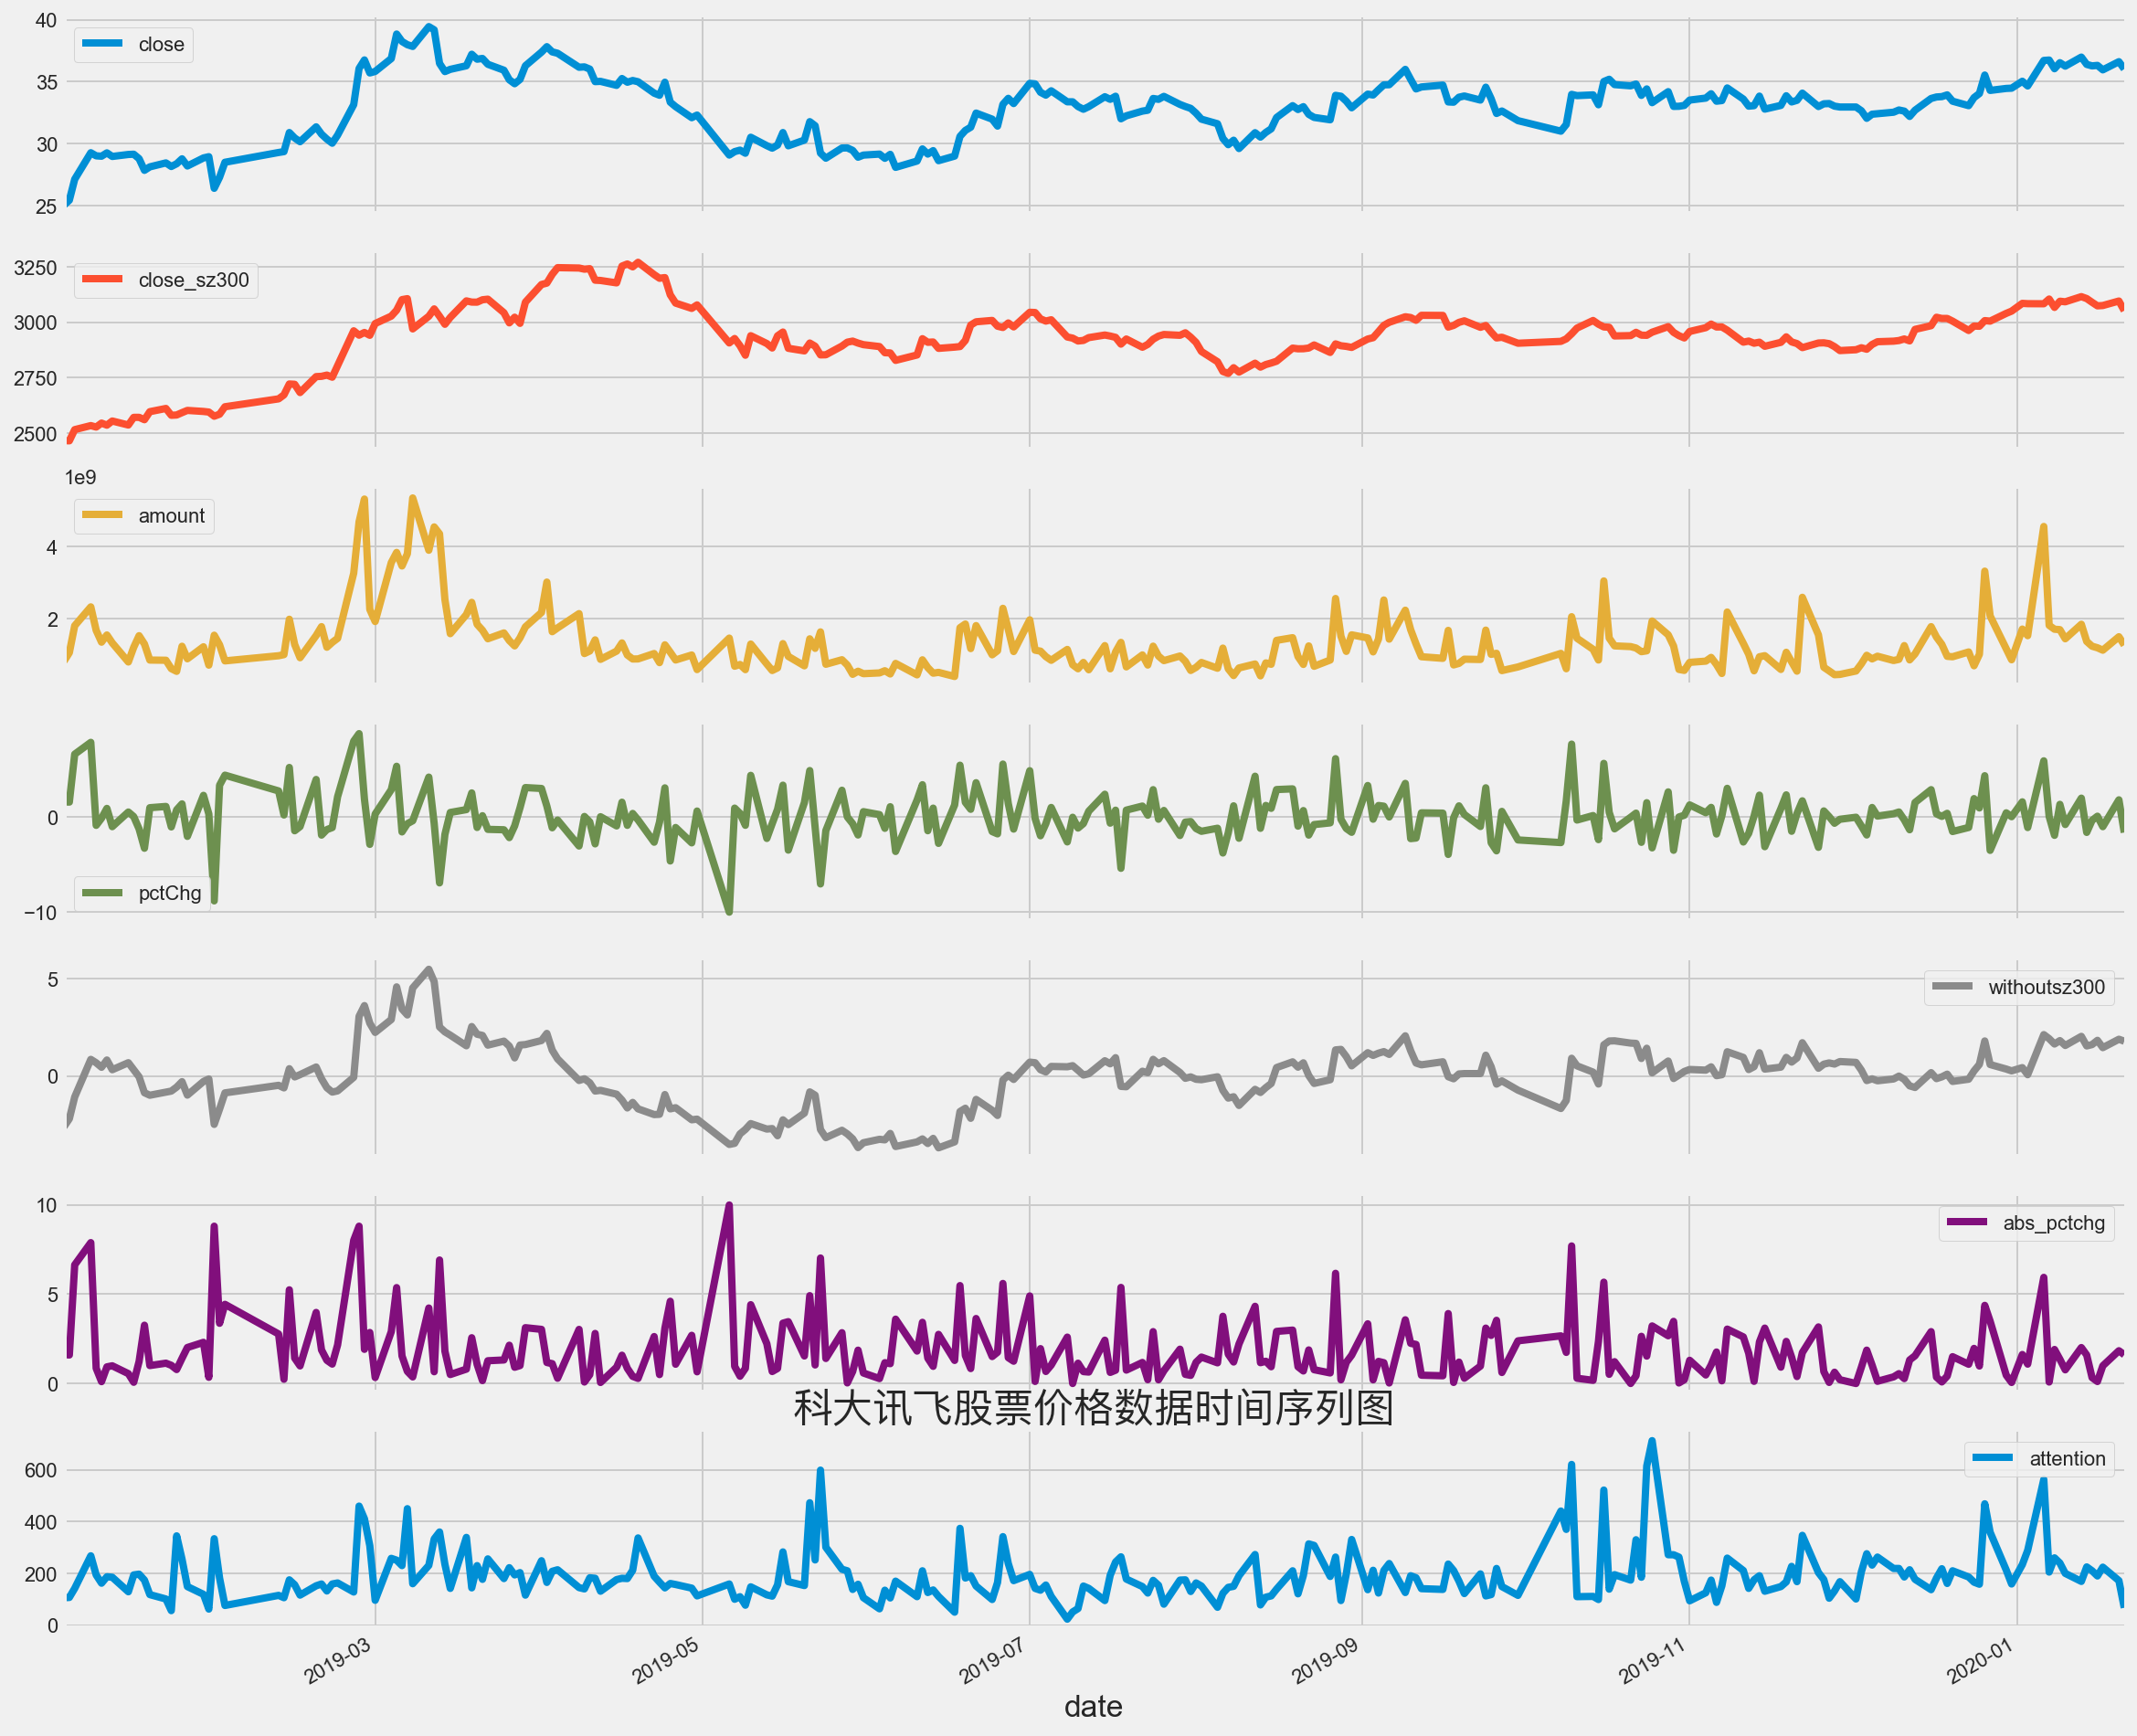

In [156]:
stock_plot(kdxf, '科大讯飞',col_name)

In [184]:
# kdxf['upordown'] = None
upordown = []
for pct in kdxf['pctChg']:
    if pct>0:
        upordown.append('1')
    else:
        upordown.append('-1')
        
kdxf['upordown'] = upordown
kdxf.head(3)

,code,open,high,low,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,close_sz300,attention,upordown,abs_pctchg,close,withoutsz300
date,,,,,,,,,,,,,,,,,,,
2019-01-02,sz.002230,24.63,25.35,24.61,24.64,32894190,8.256631e+08,1.805117,1.623383,107.999223,6.832481,7.137286,-67.064552,2465.291,106,1,1.623383,25.04,-2.619198
2019-01-03,sz.002230,24.98,25.85,24.88,25.04,41748458,1.061824e+09,2.291008,1.597443,109.724451,6.941626,7.251300,-68.135871,2464.362,107,1,1.597443,25.44,-2.208776
2019-01-04,sz.002230,25.16,27.46,25.01,25.44,68481699,1.806189e+09,3.758034,6.643076,117.013536,7.402764,7.733009,-72.662192,2514.868,142,1,6.643076,27.13,-1.085425


In [223]:
mkt_data = kdxf[['close', 'turn', 'pctChg','attention','upordown','close_sz300','psTTM','pcfNcfTTM']]
mkt_data.to_csv('market_data.csv')

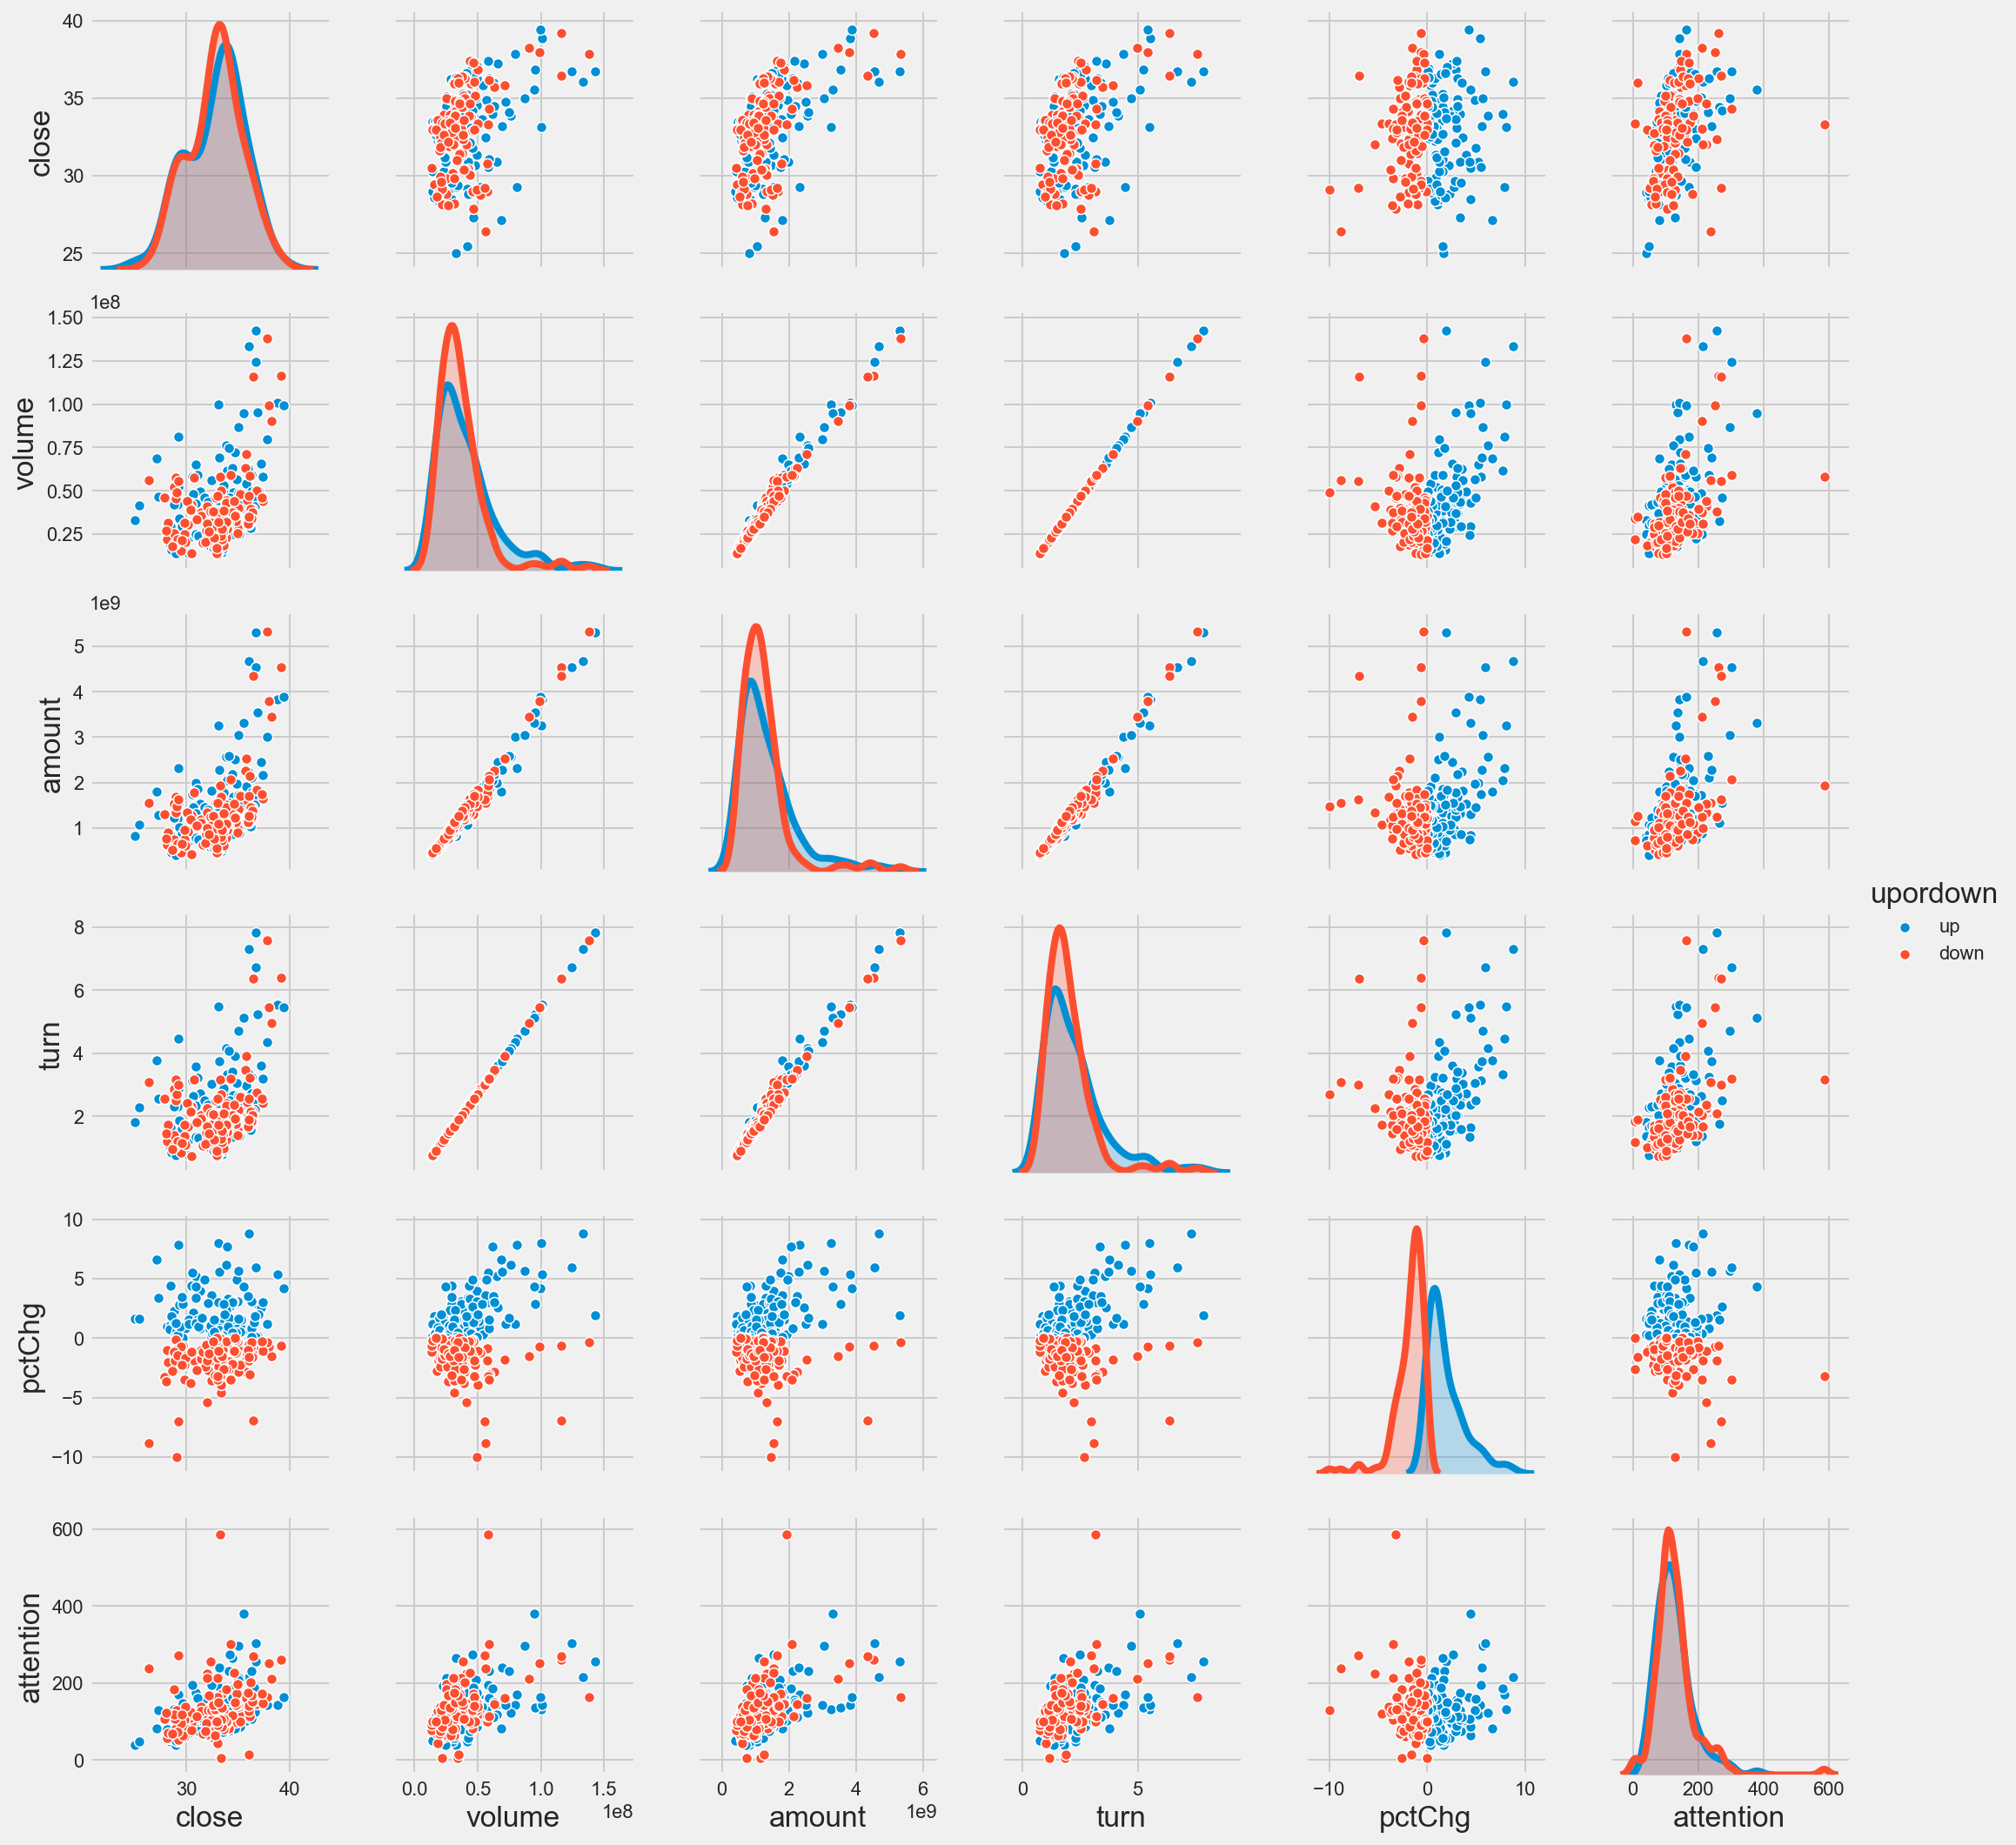

In [148]:
sns.pairplot(kdxf[['close', 'volume', 'amount', 'turn', 'pctChg','attention']], hue='upordown', size=2.5)
plt.show()

_volume_ and *turn* have a complete linear relationship, we can't keep both
*volume* and *amount* also have a strong linear pattern, also we have to choose one
since the *turn* has the smallest number, I decide to keep this feature

In [218]:
data = kdxf[['close','turn', 'pctChg','attention','upordown','close_sz300','pbMRQ','pcfNcfTTM']]

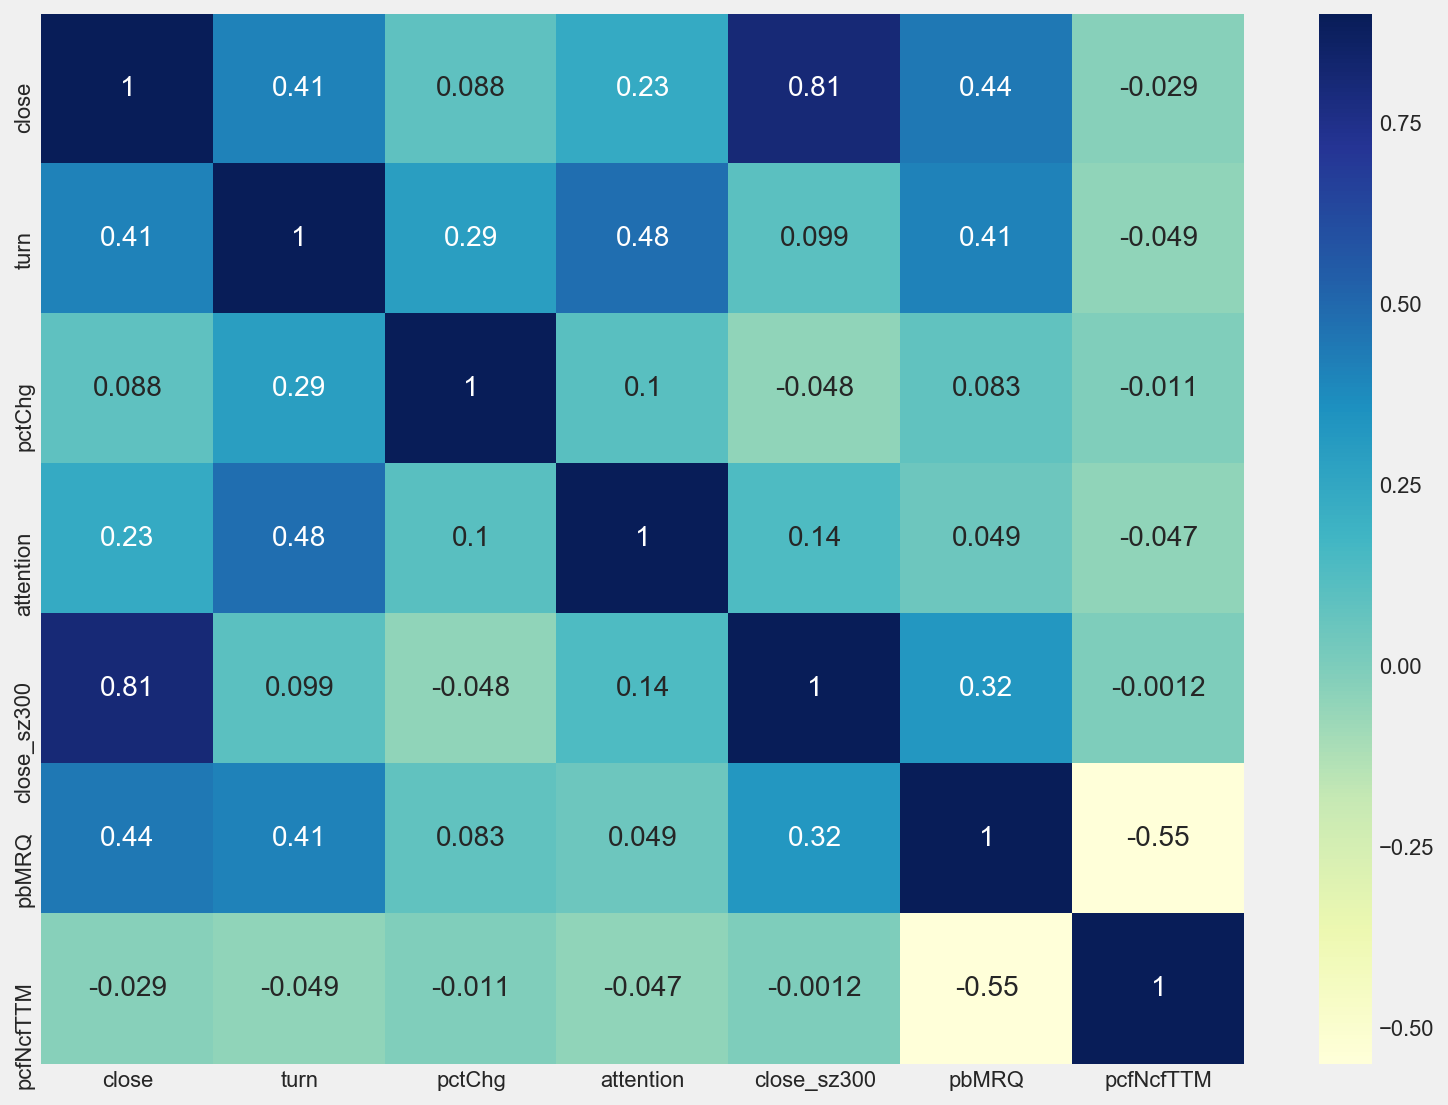

In [220]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,cmap="YlGnBu",annot=True)

In [163]:
def plot_diff(df):
    sns.set(style='ticks', context='poster')
    my_font = fm.FontProperties(fname="PingFang.ttc")
    kdxf_close = df[['close']]
    kdxf_close['diff_1'] = kdxf_close['close'].diff(1)

    kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)

    # kdxf_close['diff_3'] = kdxf_close['diff_2'].diff(1)

    # kdxf_close['diff_4'] = kdxf_close['diff_3'].diff(1)

    kdxf_close.plot(subplots=True, figsize=(16, 20))

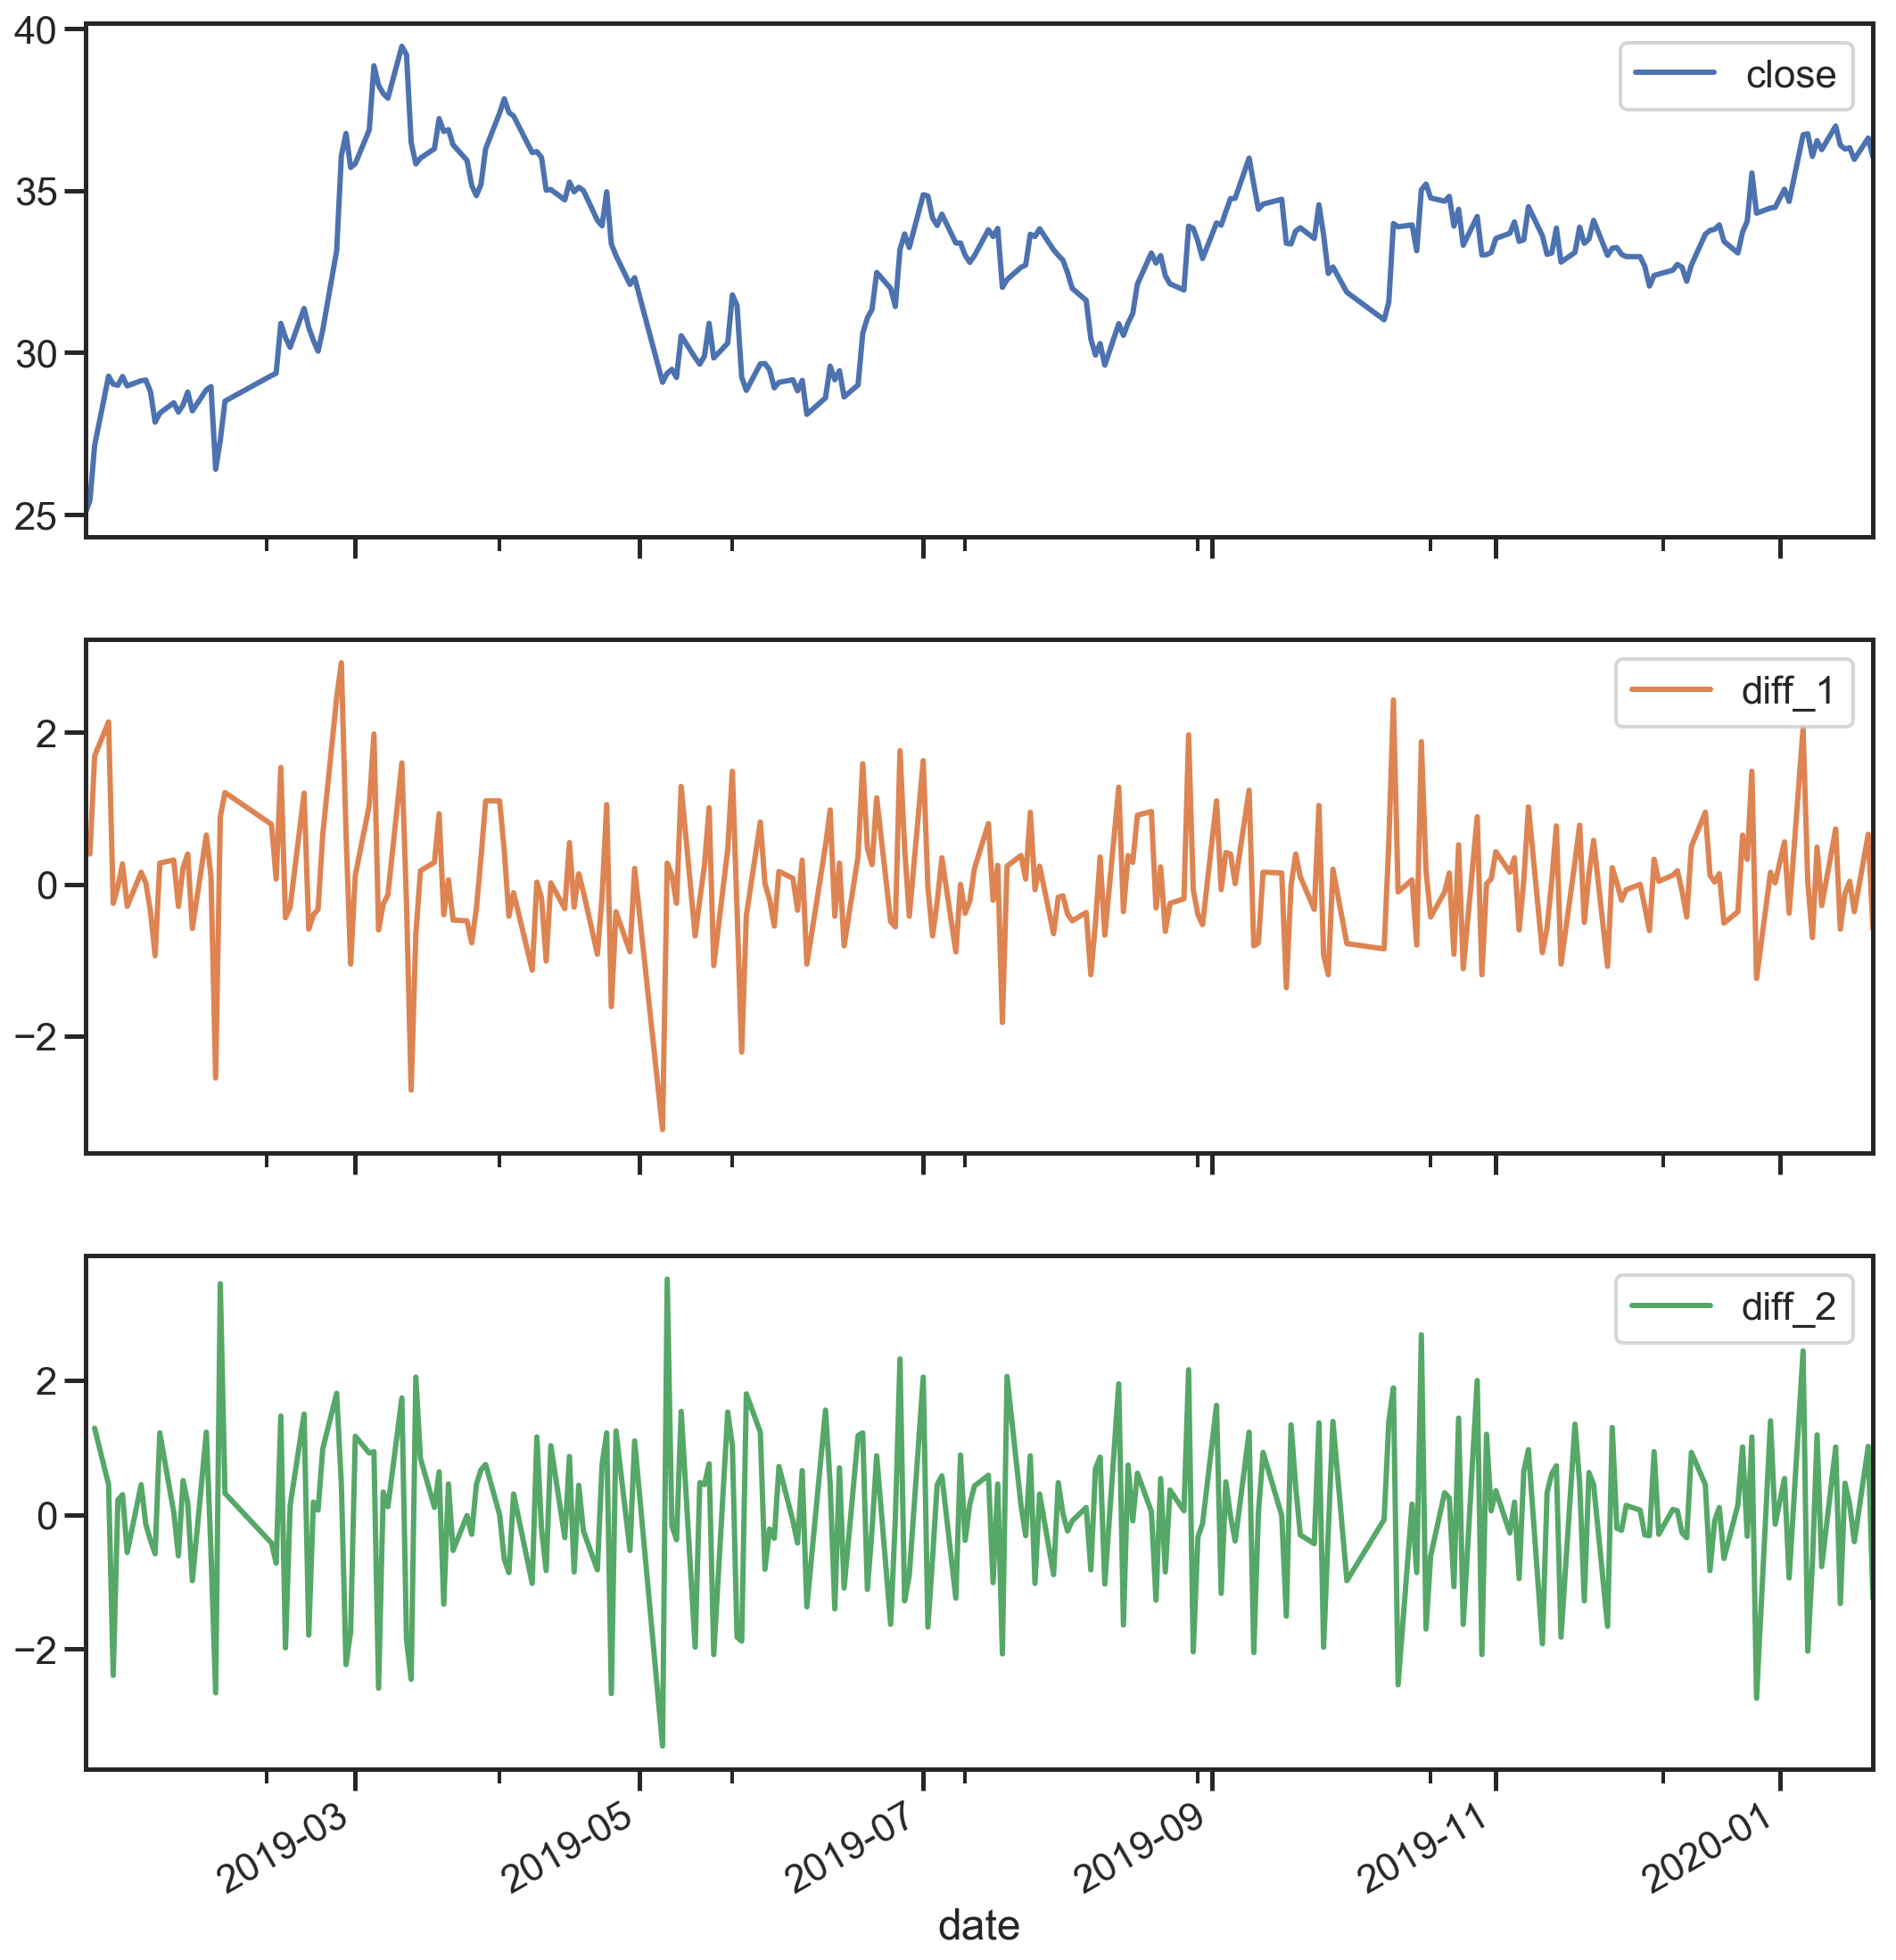

In [164]:
plot_diff(kdxf)

In [165]:
def acf_plot(df):
    sns.set(style='ticks', context='poster')
    fig = plt.figure(figsize=(12,8))

    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df, lags=20,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    # Partial Autocorrelation of closing price of kdxf stocks

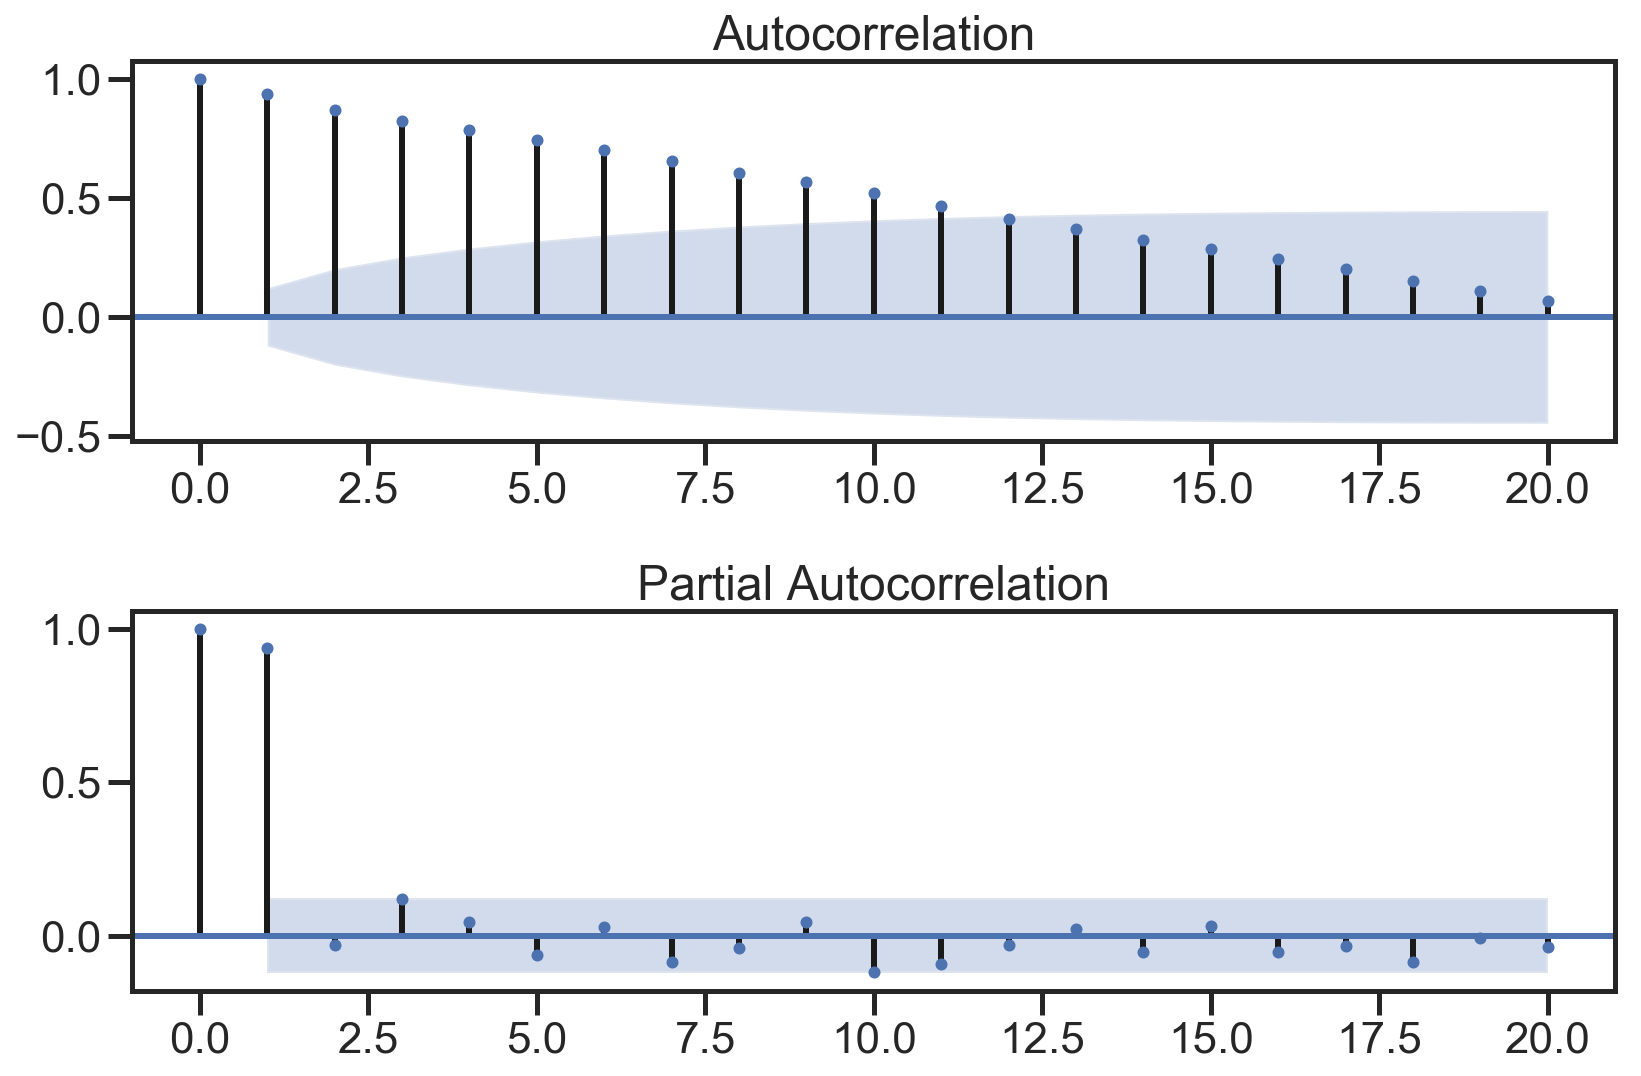

In [166]:
acf_plot(kdxf[['close']])

In [169]:
# 散点图也可以表示
def scater_stplt(df):
    lags=9

    ncols=3
    nrows=int(np.ceil(lags/ncols))
    sns.set(style='ticks', context='poster')
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

    kdxf_close = df[['close']]
#     kdxf_close['diff_1'] = kdxf_close['close'].diff(1)
#     kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)
    for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
        lag_str = 't-{}'.format(lag)
        X = (pd.concat([kdxf_close, kdxf_close.shift(-lag)], axis=1,
                       keys=['y'] + [lag_str]).dropna())

        X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
        corr = X.corr().as_matrix()[0][1]
        ax.set_ylabel('Original')
        ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
        ax.set_aspect('equal');
        sns.despine();

    fig.tight_layout();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

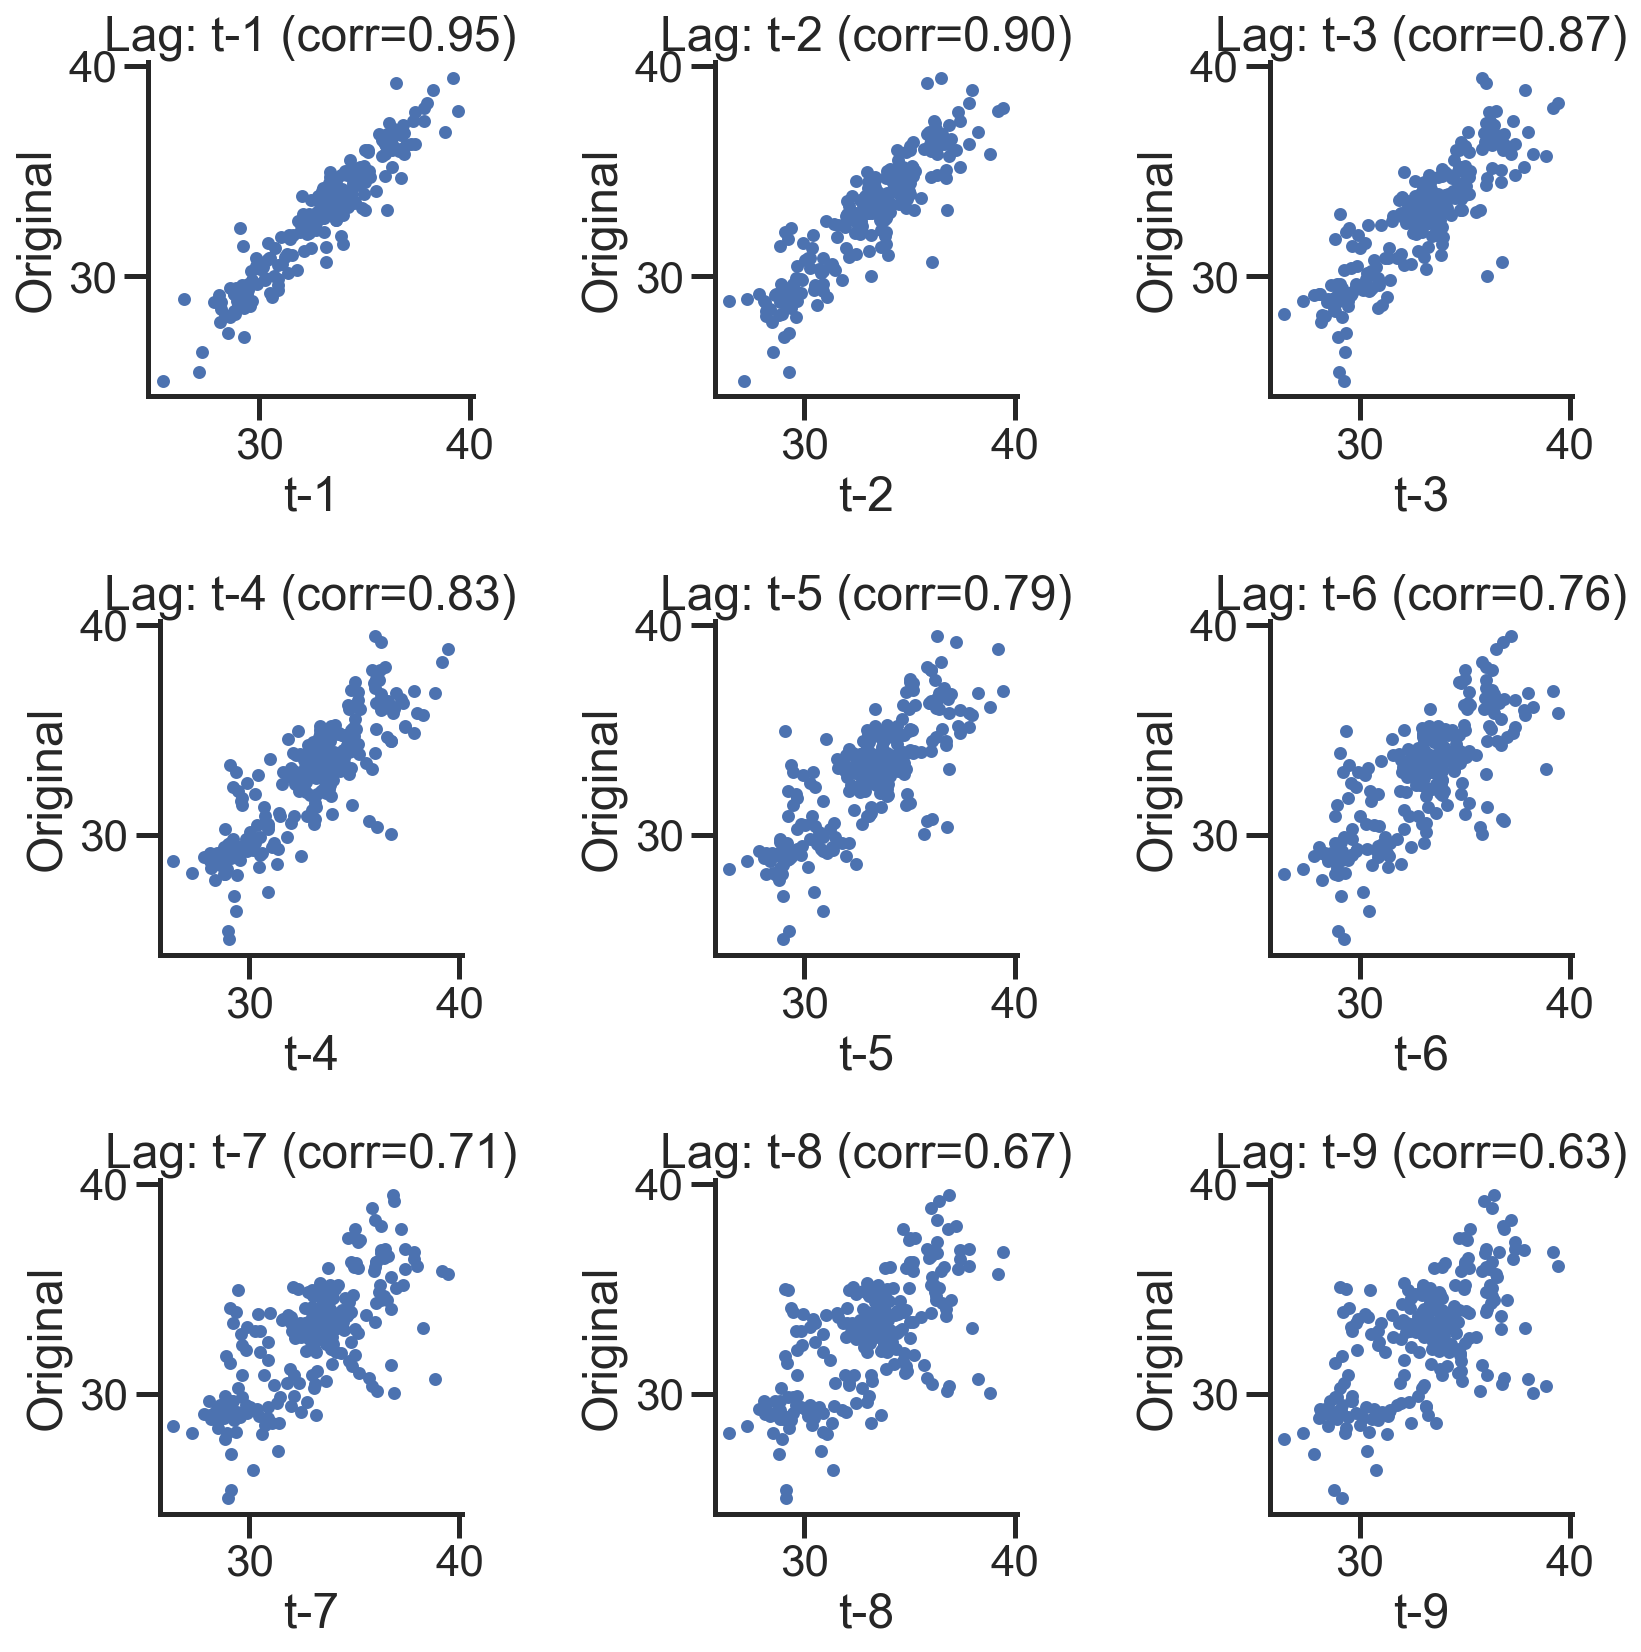

In [170]:
scater_stplt(kdxf)

### ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)<br>

$y_t = a_1y_{t-1} + ϵ_t$

ARIMA(1,0,1)<br>
$y_t = a_1y_{t-1} + ϵ_t + b_1ϵ_{t-1}$

ARIMA(1,1,1)<br>
$Δy_t = a_1Δy_{t-1} + ϵ_t + b_1ϵ_{t-1}$  <br>where $Δy_t = y_t - y_{t-1}$

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  256
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -374.574
Method:                       css-mle   S.D. of innovations              1.045
Date:                Thu, 02 Apr 2020   AIC                            755.147
Time:                        19:54:55   BIC                            765.783
Sample:                             1   HQIC                           759.425
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.045     -0.087      0.931      -0.093       0.085
ar.L1.D.y     -0.4462      0.056     -7.963      0.000      -0.556      -0.336
                                    Roots           

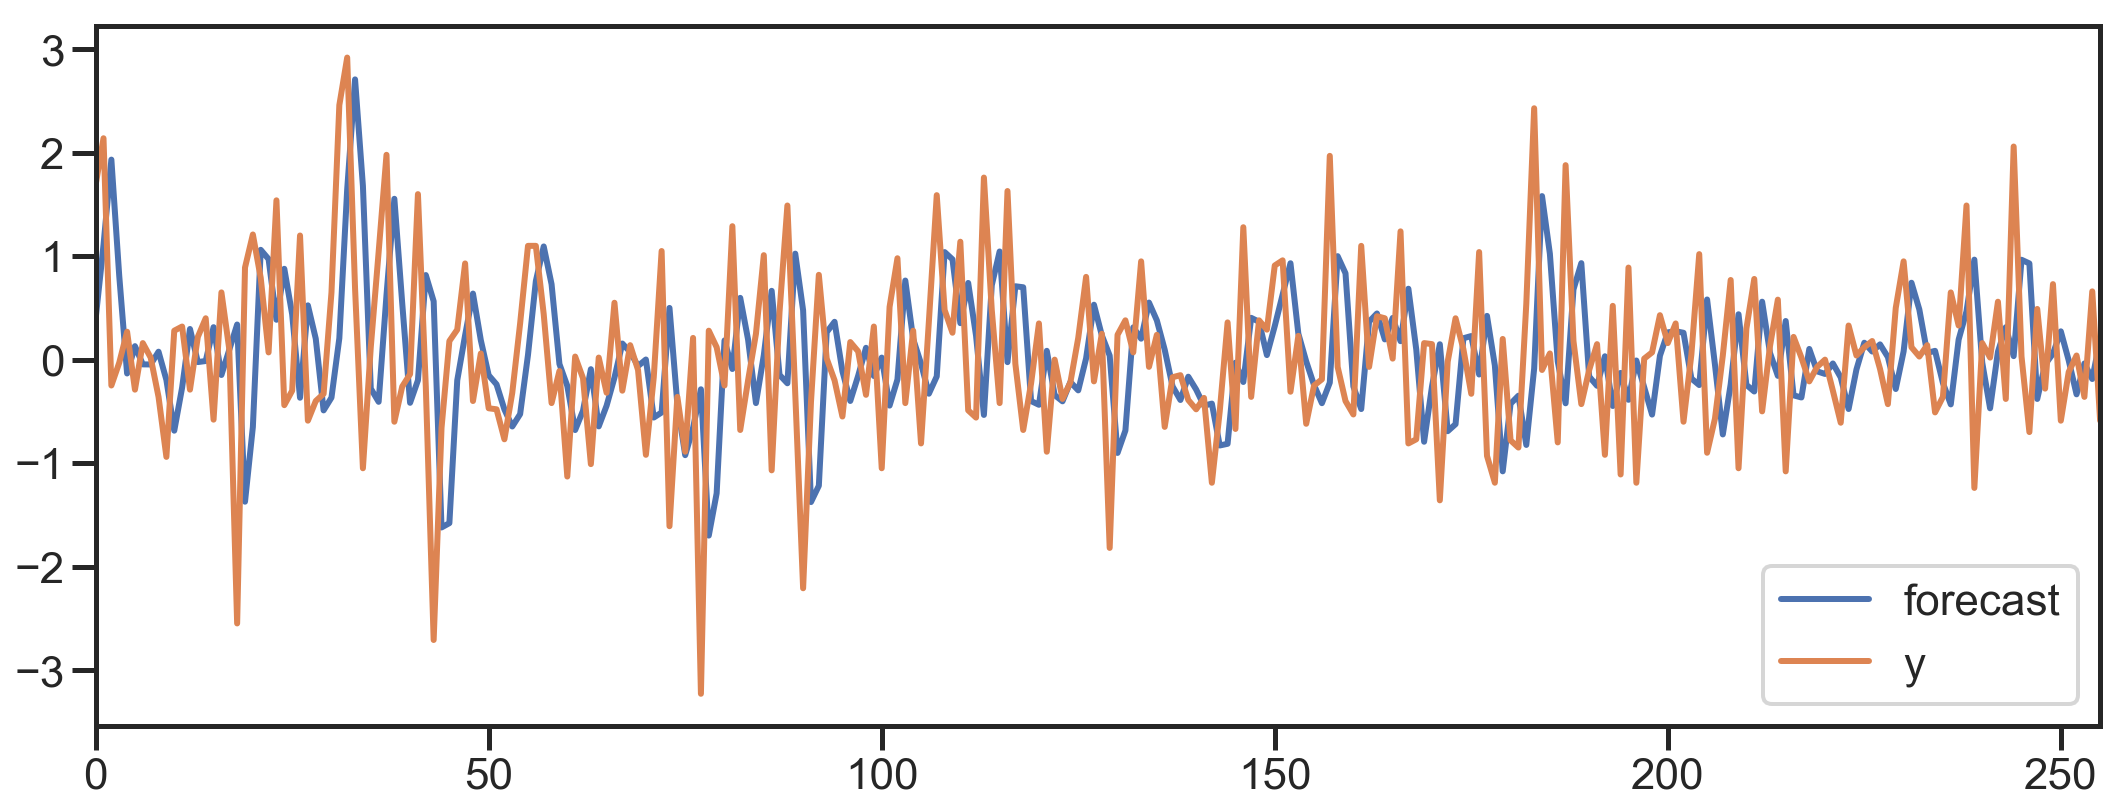

In [181]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(kdxf["close"].diff().iloc[1:].values, order=(1,1,0))
result = model.fit()
print(result.summary())
# result.plot_predict(start=700, end=1000)
result.plot_predict()
plt.show()

### Process Comments Data

In [215]:
comms_total=pd.read_csv('weibo_comms.csv')
del comms_total['usr']
comms_total.head()

,date,content,if_ori,thumbups,comments_num,numretweets,propn
0,2019-01-01,元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...,1.0,0,0,0,2.299559
1,2019-01-01,"(1003)""半部论语治天下，三个如果赢A股""之一牛股的几个特点与几大关系。""几番起落，风云...",0.0,0,1,37,0.825483
2,2019-01-01,2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...,1.0,2,2,0,0.117926
3,2019-01-01,我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...,1.0,0,0,0,0.353778
4,2019-01-01,科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...,1.0,0,1,0,0.058963


In [216]:
comms_total.isnull().any()
# comms_total.fillna(0)

date             False
content          False
if_ori            True
thumbups         False
comments_num     False
numretweets      False
propn            False
dtype: bool

In [217]:
comms_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 7 columns):
date             19237 non-null object
content          19237 non-null object
if_ori           18387 non-null object
thumbups         19237 non-null int64
comments_num     19237 non-null int64
numretweets      19237 non-null int64
propn            19237 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.0+ MB


In [218]:
tweets_num =comms_total[['date', 'content']].groupby('date').count()
# .sort_values('content', ascending=False)
tweets_num.head()

,content
date,
2019-01-01,9
2019-01-02,65
2019-01-03,58
2019-01-04,61
2019-01-05,38


<h2 style='color:coral'> Guba Comments Data Processing</h2>

In [219]:
def read_news_20(num):
    knews=pd.DataFrame()
    numls = 10*np.arange(num)[10:,]
    for num in numls:
        f_name = f'kdxf_news({num}, {num+10}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [220]:
def read_news(num):
    knews=pd.DataFrame()
    numls = 5*np.arange(num)[28:,]+np.ones(num-28, dtype=int)
    for num in numls:
        f_name = f'kdxf_news({num}, {num+4}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [221]:
k20=read_news_20(14)
k20.head()

,title,content,date
0,一大早让我空喜一场。刚开始以为是业绩预报公告，很高兴，心想这下子终于兑现了！再往,一大早让我空喜一场。刚开始以为是业绩预报公告，很高兴，心想这下子终于兑现了！再往下看，原来是...,2020-01-21
1,中标都没用,中标都没用,2020-01-21
2,科大讯飞的主力病了，病的还不轻！,科大讯飞的主力病了，病的还不轻！,2020-01-21
3,垃圾股,垃圾股,2020-01-21
4,36.40最后的加仓机会,36.40最后的加仓机会,2020-01-21


In [222]:
k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 3 columns):
title      3138 non-null object
content    3066 non-null object
date       3138 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [223]:
k20.drop_duplicates(keep='last', inplace=True)
k20.tail()

,title,content,date
3133,都说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧,都说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧,2019-12-29
3134,不管东方股肾是否打鸡血，他的存在，讯飞只能震荡,不管东方股肾是否打鸡血，他的存在，讯飞只能震荡,2019-12-29
3135,又中套路，利好机构出货，散户接单。,，，，，，，，,2019-12-28
3136,老套路,机构利好出货，散户埋单,2019-12-28
3137,1、科大讯飞目前市盈率151，实际上就一个人工智能领域的高增长型企业来说在较为合理的范围之内...,1、科大讯飞目前市盈率151，实际上就一个人工智能领域的高增长型企业来说在较为合理的范围之内...,2019-12-28


In [224]:
knews = read_news(380)
knews.head()

,comments_num,content,date,title
0,0.0,风口来了，“猪”也能飞上天。八哥买股讲究天时地利人和，“天时”即为大势，“地利”为股价的技术...,2019-12-28,风口来了，如何提前布局热点板块？
1,22.0,大家好，我是格菲大师兄Charlie，专注于上市公司和行业的深度研究，我还有六位师兄妹，他们...,2019-12-28,承包一年笑点的高科技股——科大讯飞
2,2.0,俺听说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧,2019-12-28,俺听说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧
3,0.0,要起飞了，火箭发射成功！,2019-12-28,要起飞了，火箭发射成功！
4,4.0,俺有件事始终不明白，俺天天撸干四托，它为何却咬阿凡达呢？,2019-12-28,俺有件事始终不明白，俺天天撸干四托，它为何却咬阿凡达呢？


In [225]:
knews.count()

comments_num     93877
content         131552
date            135139
title           135137
dtype: int64

In [226]:
# comms_total=comms_total.drop(comms_total[comms_total['发布工具']=="学习强国客户端"].index.tolist())
knews = knews.drop(knews[knews['content'].isnull()==True].index.tolist())

In [227]:
knews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131552 entries, 0 to 135138
Data columns (total 4 columns):
comments_num    91321 non-null float64
content         131552 non-null object
date            131552 non-null object
title           131550 non-null object
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [228]:
knews['content'].isnull().any()

False

In [229]:
knews[knews['date']=='2019-01-01']

,comments_num,content,date,title
30421,NaN,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。,2019-01-01,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。
33364,NaN,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...,2019-01-01,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我
34190,NaN,新年吃灰狗。,2019-01-01,新年吃灰狗。
34191,NaN,新年吃灰狗。,2019-01-01,新年吃灰狗。
35418,NaN,看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...,2019-01-01,看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。[大笑][大笑][大笑]
35467,NaN,科大讯飞 到底牛不牛？我想让各位用科大讯飞的技术来识别一下手镯上的文字。下图是我在多年前老家...,2019-01-01,科大讯飞 到底牛不牛？我想让各位用科大讯飞的技术来识别一下手镯上的文字。 下图是
35469,NaN,看空科大讯飞的，当时代抛弃你的时候，都不会和你说声再见。 看空科大讯飞的，当时代抛弃你的时...,2019-01-01,[大笑][大笑][大笑][大笑][大笑]看空科大讯飞的，当时代抛弃你的时候，都不
35471,NaN,2018年寒流在年底发威，2019年第一天阳光明媚气温己慢慢回暖！严寒过去，春天不会遥远。市...,2019-01-01,2018年寒流在年底发威，2019年第一天阳光明媚气温己慢慢回暖！严寒过去，春天
35482,NaN,新年会遇到的最大问题：中国式的妒忌，美国式的打压，使得无法在全球产品中有效落地，导致业绩长时...,2019-01-01,新年会遇到的最大问题：中国式的妒忌，美国式的打压，使得无法在全球产品中有效落地，
35495,NaN,飞不起来,2019-01-01,飞不起来


### get comments' contents from 2019-01-01 to 2020-01-21

### get rid of data in other dates

In [230]:
knews[['date', 'comments_num']].groupby('date').count().sort_values(by=['date'],ascending=True).head()


,comments_num
date,
2011-08-21,1
2011-12-06,1
2012-09-06,1
2012-12-27,1
2013-05-29,1



### create index of dates

In [231]:
dr1 = pd.date_range(start='1/1/19', end='01/21/20').date
# type(dr1)
news_dat = [dr.strftime("%Y-%m-%d") for dr in dr1]
np.size(news_dat)

386

In [232]:
df_1=pd.concat([k20, knews], ignore_index=True)
df = pd.DataFrame()
# df.index = knews['date']
for dt in news_dat:
    df = df.append([df_1[df_1['date']==dt]],ignore_index=True)

df.head(3)

,comments_num,content,date,title
0,NaN,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。,2019-01-01,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。
1,NaN,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...,2019-01-01,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我
2,NaN,新年吃灰狗。,2019-01-01,新年吃灰狗。


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37277 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    382 non-null float64
content         37206 non-null object
date            37277 non-null object
title           37275 non-null object
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [234]:
df.drop_duplicates(keep='last', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36558 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    359 non-null float64
content         36487 non-null object
date            36558 non-null object
title           36556 non-null object
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [235]:
df.sort_values(by=['date'],ascending=True)
df.tail(3)

,comments_num,content,date,title
37274,NaN,只要做评价的都是小散户，还有不懂股票,2020-01-21,只要做评价的都是小散户，还有不懂股票
37275,NaN,不久前，延边大学发布公告称，拟清退136名攻读硕士和博士的学生，原因是这些学生没有在学校规定...,2020-01-21,还想混日子？清华等多所高校清退1300多名研究生
37276,NaN,作者：卓利伟 高毅资产首席研究官1、时间是每个人唯一稀缺的资产做研究最为重要的是时间管理，我...,2020-01-21,一份顶尖私募的内部培训笔记：时间是每个人唯一稀缺的资产


In [236]:
# kdxf= pd.merge(kdxf,df[['date', 'content']].groupby(['date']).count()['content'],left_index=True,right_index=True)
# kdxf['attention'] = kdxf['content']
# del kdxf['content_y']
# kdxf.head(3)

In [237]:
df.head(4)

,comments_num,content,date,title
0,NaN,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。,2019-01-01,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。
1,NaN,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...,2019-01-01,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我
3,NaN,新年吃灰狗。,2019-01-01,新年吃灰狗。
4,NaN,看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...,2019-01-01,看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。[大笑][大笑][大笑]


In [238]:
# df[df['comments_num'].isnull()==True]['comments_num'].index.tolist()
# = np.zeros(34017, dtype=int)
df= df.fillna(0)
df.tail(3)

,comments_num,content,date,title
37274,0.0,只要做评价的都是小散户，还有不懂股票,2020-01-21,只要做评价的都是小散户，还有不懂股票
37275,0.0,不久前，延边大学发布公告称，拟清退136名攻读硕士和博士的学生，原因是这些学生没有在学校规定...,2020-01-21,还想混日子？清华等多所高校清退1300多名研究生
37276,0.0,作者：卓利伟 高毅资产首席研究官1、时间是每个人唯一稀缺的资产做研究最为重要的是时间管理，我...,2020-01-21,一份顶尖私募的内部培训笔记：时间是每个人唯一稀缺的资产


In [239]:
del df['title']
df.head(4)

,comments_num,content,date
0,0.0,这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。,2019-01-01
1,0.0,看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...,2019-01-01
3,0.0,新年吃灰狗。,2019-01-01
4,0.0,看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...,2019-01-01


In [240]:
df[['date','comments_num',]].groupby('date').count().head()

,comments_num
date,
2019-01-01,9
2019-01-02,40
2019-01-03,49
2019-01-04,82
2019-01-05,13


In [241]:
comms = pd.concat([comms_total,df],axis=0,join='outer',join_axes=[comms_total.columns],ignore_index=False)
comms.sample(3)

,date,content,if_ori,thumbups,comments_num,numretweets,propn
27038,2019-10-28,我草卖了就涨对不起大家了要卖这个垃圾就好了,NaN,NaN,NaN,NaN,NaN
17167,2019-12-08,希望一个很有意思的，很酷的技术，能够让他广泛的应用，这是工作，创业，的一个科学原理。当你接触...,True,0.0,1.0,0.0,0.058963
17336,2019-12-11,科大讯飞董事长刘庆峰作主题演讲 \n原始用户 平度发布\n转发内容 #宣理弘德# 科大讯飞...,False,0.0,0.0,1.0,0.058963


In [242]:
comms[comms['date'].isnull()==True]

,date,content,if_ori,thumbups,comments_num,numretweets,propn


In [243]:
comms.head()

,date,content,if_ori,thumbups,comments_num,numretweets,propn
0,2019-01-01,元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...,1.0,0.0,0.0,0.0,2.299559
1,2019-01-01,"(1003)""半部论语治天下，三个如果赢A股""之一牛股的几个特点与几大关系。""几番起落，风云...",0.0,0.0,1.0,37.0,0.825483
2,2019-01-01,2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...,1.0,2.0,2.0,0.0,0.117926
3,2019-01-01,我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...,1.0,0.0,0.0,0.0,0.353778
4,2019-01-01,科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...,1.0,0.0,1.0,0.0,0.058963


In [253]:
# comms[comms['if_ori']==True]=np.ones(len(comms[comms['if_ori']==True]))
# comms['if_ori'][comms['if_ori']==False]=np.zeros(len(comms[comms['if_ori']==False]))
comms.sample(5)

,date,content,if_ori,thumbups,comments_num,numretweets,propn
5310,2019-04-19,#东方财富#科大讯飞(002230.SZ)2018年净利润升24.71%至5.42亿元科大讯...,1.0,4.0,0.0,0.0,0.058963
7110,2019-05-23,黑名單與備胎美国彭博社22日早些时候报道称，知情人士透露，美国正在考虑将杭州海康威视数字技术...,1.0,6.0,0.0,0.0,0.117926
15694,2019-11-09,#锦江时光# 【⚡迎新晚会⚡】文学与传媒学院、计算机学院、人工智能科大讯飞学院联合举办的“2...,1.0,9.0,1.0,0.0,0.058963
30526,2019-12-03,股婶通行证上都要加盖“假如”两字印章才有效。注意，凡没有假如二字的，都不算股婶,1,0.0,NaN,0.0,0.000000
30833,2019-12-05,昨天是哪个说科大讯飞弄虚做假的？出来再说下,1,0.0,NaN,0.0,0.000000


In [261]:
comms=comms.drop(comms[comms['date']==1].index.tolist())
comms['if_ori'] = comms['if_ori'].fillna(float(1.0))
comms[['thumbups','numretweets','propn']] = comms[['thumbups','numretweets','propn']].fillna(float(0.0))
comms.fillna(0)
comms.sample(10)

,date,content,if_ori,thumbups,comments_num,numretweets,propn,cleaned_contents
16699,2019-07-01,飞了飞了,1,0.0,NaN,0.0,0.000000,None
8461,2019-03-30,天天关心科大讯飞的股票，倒不如你去尝试一下讯飞输入法。就目前来讲，讯飞输入法是最好用的。,1,0.0,NaN,0.0,0.000000,None
25751,2019-10-22,至少跌2个月，每天跌一点，这比就这样，傻逼公司,1,0.0,NaN,0.0,0.000000,None
13533,2019-05-25,一家企业的管理层过渡的关心股价是一件非常危险的游戏，乐视网，康美药业，包括长生制药最后闹出问...,1,0.0,NaN,0.0,0.000000,None
17671,2019-07-17,来源：证券时报网 中信证券指出，AI战略2.0聚焦产品化、经营质量与人均毛利，公司收入...,1,0.0,NaN,0.0,0.000000,None
2954,2019-02-17,海通证券认为，在人工智能领域，科创板的潜在热门公司主要包括寒武纪、优必选、旷视科技、云从科技...,1,0.0,NaN,0.0,0.000000,None
5199,2019-04-17,//@飞马537//@TYJ田家村--暗色斯图卡//@安西杂谈,0.0,0.0,1.0,0.0,0.058963,None
592,2019-01-10,今天6万卖在了最高点,1,0.0,NaN,0.0,0.000000,None
6021,2019-05-12,市场消息面：1.人工智能项目指南和细则即将发布，行业有望迎来风口人工智能概念股：中科信息（3...,1.0,1.0,0.0,0.0,0.058963,None
25363,2019-10-18,融资盘出货,1,0.0,NaN,0.0,0.000000,None


In [263]:
comms.drop_duplicates(keep='last', inplace=True)

In [264]:
comms.count()

date                54247
content             54247
if_ori              54247
thumbups            54247
comments_num        17994
numretweets         54247
propn               54247
cleaned_contents        0
dtype: int64

In [265]:
comms=comms.drop(comms[comms['content']==0].index.tolist())

In [266]:
comms[comms['content']==0]

,date,content,if_ori,thumbups,comments_num,numretweets,propn,cleaned_contents


In [267]:
comms['content'].count()

54247

In [268]:
comms['cleaned_contents'] = None
cleaned_contents=[]

In [269]:
for com in comms['content']:
    try:
        if len(com)>=100:
            com=com[:101]
        elif len(com)<=50:
            com = com[:36]
        cleaned_contents.append(com)
    except:
        print(f"fail to read : {com}")
    
#     print(type(com))

In [270]:
len(cleaned_contents)

54247

In [271]:
# cleaned_contents.append(comms['content'].loc[0].values[0][:36])
comms['cleaned_contents'] = cleaned_contents
del comms['content']

In [272]:
comms['cleaned_contents'].head(10)

0    元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...
1    (1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云...
2    2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...
3    我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...
4    科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...
5    转发微博//@斯威汽车#SWM斯威X7互联版#科大讯飞智能语音控制系统，为用户带来便捷的智能...
6    #口袋神器# 华为，大疆，科大讯飞……欣喜看到这些自主品牌完胜竞品，去年十月美国用大疆的Os...
7               索菲亚和科大讯飞的AI已经能理解了  \n原始用户 爱可可-爱生活\n转发内
8    #字述一年# 我是@科大讯飞 ，2018年就是一个字：智。【VIVI积极扩散，期待好运哦】！...
9    1、         今日超大单：上证（000001）-9.35亿、深成（399001）-1...
Name: cleaned_contents, dtype: object

In [273]:
comms.head()

,date,if_ori,thumbups,comments_num,numretweets,propn,cleaned_contents
0,2019-01-01,1.0,0.0,0.0,0.0,2.299559,元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...
1,2019-01-01,0.0,0.0,1.0,37.0,0.825483,"(1003)""半部论语治天下，三个如果赢A股""之一牛股的几个特点与几大关系。""几番起落，风云..."
2,2019-01-01,1.0,2.0,2.0,0.0,0.117926,2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...
3,2019-01-01,1.0,0.0,0.0,0.0,0.353778,我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...
4,2019-01-01,1.0,0.0,1.0,0.0,0.058963,科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...


In [274]:
comms.to_csv('news_data.csv',index=False)

In [213]:
# kdxf= pd.merge(kdxf,comms[['date','cleaned_contents']].groupby('date').count(),left_index = True, right_index = True)
# kdxf.head()

In [214]:
#  # comms['attention'] = None
# kdxf['attention'] = kdxf['cleaned_contents']
# del kdxf['cleaned_contents']
# kdxf.head(3)

### Sentiment Analysis

In [3]:
import pandas as pd
# comms=pd.read_csv('news_data.csv')
comms['sentiment'] = None

In [15]:
10*np.arange(int(len(comms['cleaned_contents'])/10 + 1))[2:3,]

array([20])

In [24]:
import senti as ST
import numpy as np
for i in 10*np.arange(int(len(comms['cleaned_contents'])/10 + 1))[2:3,]:
    try:
    #     sentiment = ST.get_label(comms['content'].iloc[i:i+10,])
    #     senti.extend(sentiment)
        comms['sentiment'].iloc[i:i+10,] = ST.get_label(comms['cleaned_contents'].iloc[i:i+10,])
        print("\n-----page",int(i/10),"---------\n")
        #     print(senti)
    except:
        print(f"\n-- page {i}-{i+10} fail to read\n")

{"error_code":17,"error_msg":"Open api daily request limit reached"}

-- page 20-30 fail to read



In [18]:
print(comms['sentiment'].count())

# comms.to_csv("with_senti.csv")

10740


In [29]:
pd.read_csv?

In [31]:
comms=pd.read_csv('with_senti.csv',index_col='date')
del comms['Unnamed: 0']
comms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54247 entries, 2019-01-01 to 2020-01-21
Data columns (total 7 columns):
if_ori              54247 non-null object
thumbups            54247 non-null float64
comments_num        17994 non-null float64
numretweets         54247 non-null float64
propn               54247 non-null float64
cleaned_contents    54247 non-null object
sentiment           10846 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.3+ MB


In [34]:
comms.sample(3)

,if_ori,thumbups,comments_num,numretweets,propn,cleaned_contents,sentiment
date,,,,,,,
2019-04-02,1.0,0.0,NaN,0.0,0.000000,用友近期都超过你的市值，垃圾讯飞,NaN
2019-10-10,True,12.0,8.0,1.0,0.117926,【#台湾节目惊叹大陆黑科技#“能翻译方言” 网友吐槽：我们都统一普通话了】10月9日，台湾一...,NaN
2019-12-03,1.0,0.0,NaN,0.0,0.000000,韭菜赶紧跑,NaN


In [42]:
comms[comms['sentiment']==0.0]['cleaned_contents'].to_csv('kneg.txt',index=False)

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [43]:
comms[comms['sentiment']==1.0]['cleaned_contents'].to_csv('kpos.txt',index=False)

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [20]:
comms[comms['sentiment'].isnull()==True].count()

date                43507
if_ori              43507
thumbups            43507
comments_num         7254
numretweets         43507
propn               43507
cleaned_contents    43507
sentiment               0
dtype: int64

### Using SVM method to predict

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pickle
import datetime
import os
import subprocess
import sys

In [ ]:
def loadDataFiles(mkt, news):
    market_df = pd.read_csv(mkt+'.csv')
    news_df = pd.read_csv(news+'.csv')
    print('Finished loading datafiles!')
    return market_df, news_df

def preprocess_data(mkt_df, news_df):
    mkt_df['date'] = pd.to_datetime(mkt_df['date'])
    news_df['date'] = pd.to_datetime(news_df['date'])
    mkt_df['date'] = mkt_df['date'].dt.date
    news_df['date'] = news_df['date'].dt.date
    merged = pd.merge(mkt_df, news_df, how='left', on=['date'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged

def regularize(df):
    for column in df:
        colmin = np.amin(df[column])
        colmax = np.amax(df[column])
        df[column] = (df[column] - colmin) / (colmax - colmin)
    return df

In [ ]:
from sklearn.preprocessing import StandardScaler
X = preprocess_data(loadDataFiles(#mkt, #news))
X = regularize(X)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
def writeToJson(fileInput):
    file = open("input.json", "w+")
    
    for index, row in fileInput.iterrows():
        writer = "["
        for i in range(len(row)):
            if(i == len(row)-1):
                writer += str(row[i])
            else:
                writer += str(row[i]) + ", "
        writer += "]\n"
        file.write(writer)
    
    file.close()

In [ ]:
writeToJson(X.iloc[round(len(X) * 0.7):round(len(X) * 0.7) + 10000, :])

In [ ]:
model = SVR(verbose = True)
model.fit(X.iloc[:round(len(X) * 0.7), :], y.iloc[:round(len(y) * 0.7)])

In [182]:
model.predict([[1, 1]])

array([1.5])

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(6.5)

In [ ]:
# import pandas as pd
# import csv

# for i in range(180,186):  # 爬取全部185页数据
#     url = 'http://s.askci.com/stock/a/?reportTime=2019-12-31&pageNum=%s' % (str(i))
#     tb = pd.read_html(url)[3] #经观察发现所需表格是网页中第4个表格，故为[3]
#     tb.to_csv(r'2019_12_31.csv', mode='a', encoding='utf_8_sig', header=1, index=0)
#     print('第'+str(i)+'页抓取完成')

In [ ]:
# import pysnowball as ball
# baj = ball.quotec('SZ002230')['data'][0]
# # baj
# data_kdxf = pd.DataFrame(baj, index=range(1, len(baj)+1))
# data_kdxf